In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [3]:
pd.set_option('display.max_colwidth', None)

training_corpus    = fetch_20newsgroups(subset = 'train', 
                                        remove = ('headers', 'footers', 'quotes'))

df                 = pd.DataFrame({'text'  : training_corpus.data, 
                                   'target': training_corpus.target})

df['target_names'] = df['target'].apply(lambda x: training_corpus.target_names[x])

df.head(2)

,text,target,target_names
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.",7,rec.autos
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.",4,comp.sys.mac.hardware


In [4]:
# newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# # Display the first few entries
# for i in range(2):
#     print(f"Text {i+1}:\n{newsgroups_train.data[i]}\n")
#     print(f"Target {i+1}: {newsgroups_train.target[i]} - {newsgroups_train.target_names[newsgroups_train.target[i]]}\n")

In [5]:
# from sklearn.datasets import fetch_20newsgroups

# # Fetch the training subset of the dataset without removing headers, footers, and quotes
# newsgroups_train = fetch_20newsgroups(subset='train')

# # Display the first few entries
# for i in range(2):
#     print(f"Text {i+1}:\n{newsgroups_train.data[i]}\n")
#     print(f"Target {i+1}: {newsgroups_train.target[i]} - {newsgroups_train.target_names[newsgroups_train.target[i]]}\n")


In [36]:
len(training_corpus.data)

11314

In [7]:
print(training_corpus.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [8]:
np.unique(training_corpus.target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

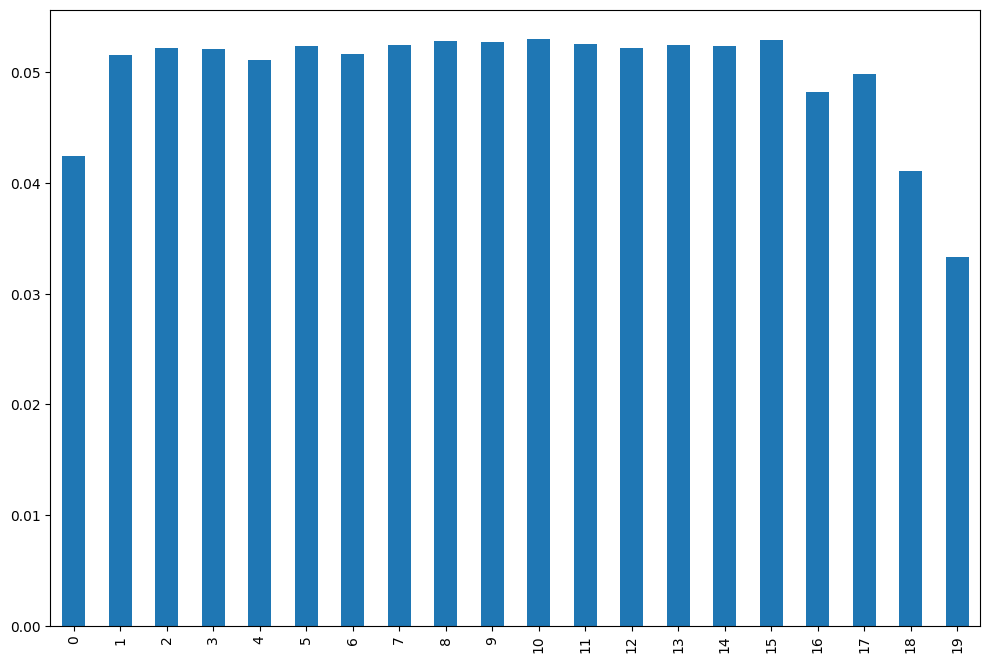

In [9]:
bins, counts = np.unique(training_corpus.target, return_counts=True)

plt.figure(figsize=(12, 8))
ax = pd.Series(counts/len(training_corpus.data)).plot(kind='bar')
#ax.set_xticklabels(bins, rotation=0)
